In [1]:
import matplotlib as mpl 
import numpy as np
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.optimize import curve_fit
from numpy.linalg import inv
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from matplotlib.colors import LinearSegmentedColormap

import os.path
dir = os.getcwd()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "Bell MT"})
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)

def setlabel(ax, label, loc=2, borderpad=0.6, color = False, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(np.NaN,np.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],loc=loc,handlelength=0,handleheight=0,
                             handletextpad=0,borderaxespad=0,borderpad=borderpad,**kwargs)
    if color:
        for text in label_legend.get_texts():
            text.set_color("red")
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()

def detalhes(ax, loc, aux):
    if aux:
        ax.legend(numpoints = 1, borderpad = .45, handlelength = 1.5, handletextpad = .6, labelspacing = 0.3, 
                  loc = loc, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 14, ncol = 1)
    ax.minorticks_on()
    ax.tick_params(axis = 'both', labelsize = 12,
                  length = 3, width = 1., colors='black', pad = 5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis = 'both', which = 'major',
                  direction = 'in', length = 5, width = .8, colors='black')
    ax.tick_params(axis = 'both', which = 'minor',
                  direction = 'in', length = 2, width = .8, colors='black',
                  top=True, right=True)
    for spine in ax.spines.values():
        spine.set_linewidth(.6)

def limits(a, b, ax):
    if a>b : a, b = b, a
    ymin, ymax = ax.get_ylim()
    dy = ymax-ymin
    return ((y-ymin)/dy for y in (a, b))

In [2]:
import pandas as pd

df = pd.read_csv("data/all_data_update.txt", delim_whitespace=True)

# Acessa cada coluna como uma lista
N = df['N'].tolist()
dim = df['dim'].tolist()
alpha_a = df['alpha_a'].tolist()
alpha_g = df['alpha_g'].tolist()
N_samples = df['N_samples'].tolist()
short_mean = df['short_mean'].tolist()
short_err = df['short_err'].tolist()
short_err_per = df['short_err_per'].tolist()
diameter_mean = df['diameter_mean'].tolist()
diameter_err = df['diameter_err'].tolist()
diameter_err_per = df['diameter_err_per'].tolist()
ass_coeff_mean = df['ass_coeff_mean'].tolist()
ass_coeff_err = df['ass_coeff_err'].tolist()
ass_coeff_err_per = df['ass_coeff_err_per'].tolist()

In [3]:
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_err_per,diameter_mean,diameter_err,diameter_err_per,ass_coeff_mean,ass_coeff_err,ass_coeff_err_per
0,5000,4,13.0,2.0,60952,12.712090,0.002927,0.023023,30.373523,0.009610,0.031639,-0.000145,0.000060,41.836001
1,5000,3,12.0,2.0,40912,13.292194,0.003339,0.025119,31.513981,0.011763,0.037325,-0.000052,0.000072,139.980567
2,5000,4,7.5,2.0,30996,11.503357,0.004193,0.036450,27.971222,0.012988,0.046434,-0.036049,0.000088,0.245332
3,5000,2,6.5,2.0,28277,13.366251,0.004089,0.030594,31.977897,0.014946,0.046737,-0.007291,0.000088,1.201787
4,10000,4,12.0,2.0,24310,13.786958,0.004756,0.034496,33.228754,0.015503,0.046654,0.000701,0.000074,10.546518


# 1. Average assortativity coefficient as a function of the parameter $\alpha_G$

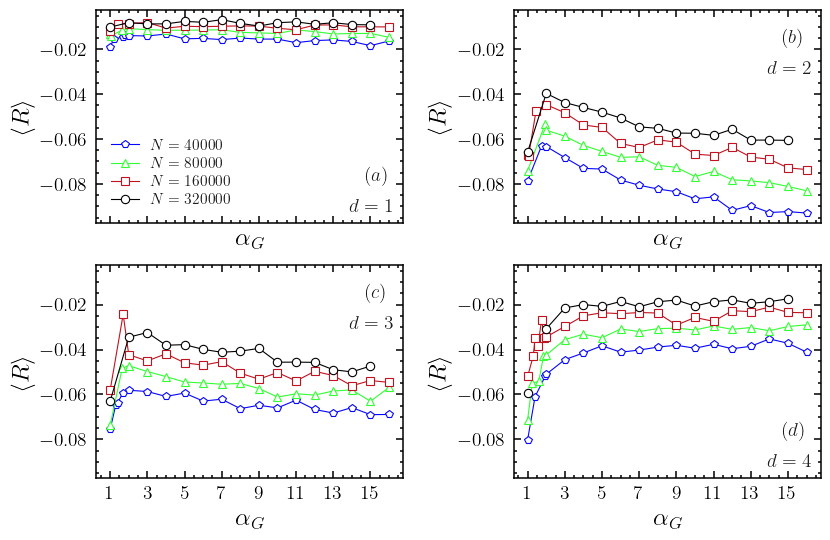

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_A = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_a'] == alpha_A) & (df['dim'] == d)].copy()
        x, y = _df['alpha_g'].tolist(), _df['ass_coeff_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        
        ax.plot(x_sorted, y_sorted, marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in axs:
    ax.set_xlabel(r'$\alpha_G$', fontsize=18)
    ax.set_ylabel(r'$\langle R \rangle$', fontsize=18)
    ax.set_xticks(np.arange(1, 17, 2))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[0]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 3, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1, bbox_to_anchor=[0, 0])

setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.8, 0.15])
setlabel(axs[0], r'$(a)$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$d = 2$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.8, 0.8])
setlabel(axs[1], r'$(b)$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.85, 0.95])
setlabel(axs[2], r'$d = 3$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.8, 0.8])
setlabel(axs[2], r'$(c)$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.85, 0.95])
setlabel(axs[3], r'$d = 4$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.8, 0.15])
setlabel(axs[3], r'$(d)$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[.85, 0.3])

plt.tight_layout()
# plt.savefig('img/Fig02.pdf', bbox_inches='tight')
plt.show()

# 2. Average assortativity coefficient as a function of the parameter $\alpha_A$

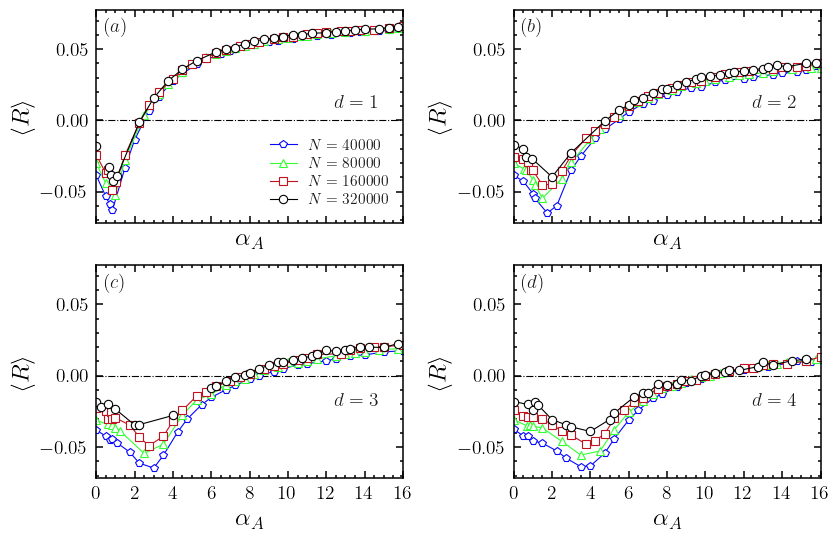

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_G = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    ax.plot([0, 16], [0, 0], '-.', color = 'k', lw = .8)
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
        x, y = _df['alpha_a'].tolist(), _df['ass_coeff_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        sample_idx = np.linspace(0, len(x_sorted) - 1, 30, dtype=int)
        
        ax.plot(np.array(x_sorted)[sample_idx], np.array(y_sorted)[sample_idx], marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in axs:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    ax.set_ylabel(r'$\langle R \rangle$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_xticks(np.arange(0, 18, 2))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[0]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 4, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1, bbox_to_anchor=[1, 0])

setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.75, 0.64])
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.75, 0.64])
setlabel(axs[1], r'$(b)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.75, 0.44])
setlabel(axs[2], r'$(c)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.75, 0.44])
setlabel(axs[3], r'$(d)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig03.pdf', bbox_inches='tight')
plt.show()

# 3. Distances distribution

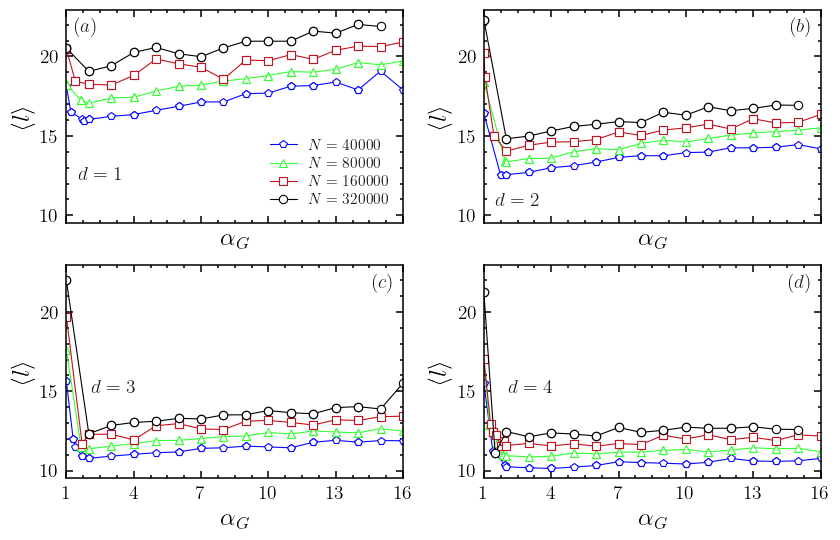

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_A = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_a'] == alpha_A) & (df['dim'] == d)].copy()
        x, y = _df['alpha_g'].tolist(), _df['short_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        sample_idx = np.linspace(0, len(x_sorted) - 1, 30, dtype=int)
        
        ax.plot(np.array(x_sorted)[sample_idx], np.array(y_sorted)[sample_idx], marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in axs:
    ax.set_xlabel(r'$\alpha_G$', fontsize=18)
    ax.set_ylabel(r'$\langle l \rangle$', fontsize=18)
    ax.set_xlim([1, 16])
    ax.set_xticks(np.arange(1, 18, 3))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[0]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 4, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1, bbox_to_anchor=[1, 0])

setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.3])
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.18])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.05, 0.5])
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.05, 0.5])
setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig04.pdf', bbox_inches='tight')
plt.show()

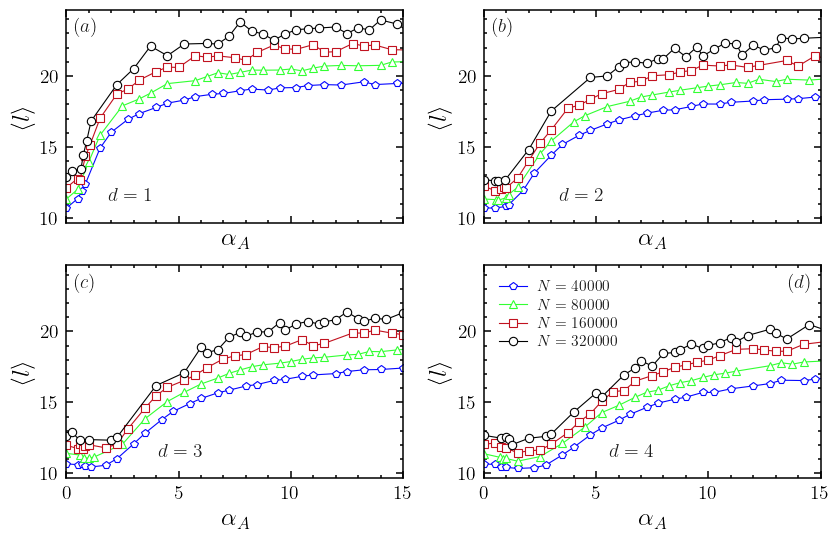

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_G = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
        x, y = _df['alpha_a'].tolist(), _df['short_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        sample_idx = np.linspace(0, len(x_sorted) - 1, 30, dtype=int)
        
        ax.plot(np.array(x_sorted)[sample_idx], np.array(y_sorted)[sample_idx], marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in axs:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    ax.set_ylabel(r'$\langle l \rangle$', fontsize=18)
    ax.set_xlim([0, 15])
    # ax.set_xticks(np.arange(1, 18, 3))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[-1]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 2, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1)

setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.1, 0.2])
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.2, 0.2])
setlabel(axs[1], r'$(b)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.25, 0.2])
setlabel(axs[2], r'$(c)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.35, 0.2])
setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig06.pdf', bbox_inches='tight')
plt.show()

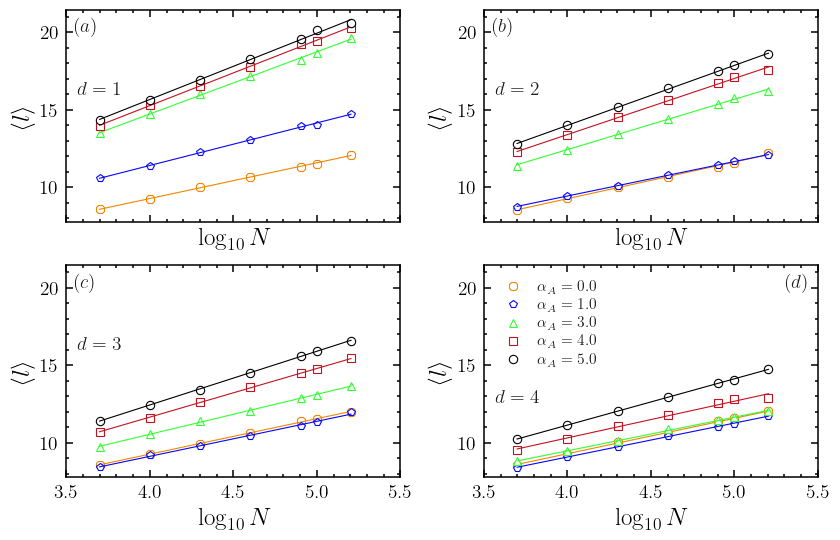

In [113]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_G = 2.0
dimensions = [1, 2, 3, 4]
alphas_A = [0, 1, 3, 4, 5]

colors = ['#f18701', '#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['8', 'p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    for i, alpha_A in enumerate(alphas_A):
        _df = df[(df['alpha_a'] == alpha_A) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
        x, y = _df['N'].tolist(), _df['short_mean'].tolist()
        x = np.log10(x)
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        x_sorted, y_sorted = np.array(x_sorted), np.array(y_sorted)
        mask = x_sorted <= 5.5
        
        ax.plot(x_sorted[mask], y_sorted[mask], marker=markers[i], color=colors[i],
               linestyle='', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$\alpha_A = %.1lf$' % alpha_A)
        def model(x, a, b):
            return a * x + b
        popt, pcov = curve_fit(model, x_sorted[mask], y_sorted[mask], method='lm', maxfev=10000)
        xe = np.linspace(np.min(x_sorted[mask]), np.max(x_sorted[mask]), 100)
        y_fit = model(xe, *popt)
        ax.plot(xe, y_fit, color = colors[i], lw = .8)
    
for ax in axs:
    ax.set_xlabel(r'$\log_{10}N$', fontsize=18)
    ax.set_ylabel(r'$\langle l \rangle$', fontsize=18)
    ax.set_xlim([3.5, 5.5])
    ax.set_xticks([3.5, 4, 4.5, 5, 5.5])
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[-1]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 2, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1)

setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.7])
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.7])
setlabel(axs[1], r'$(b)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.7])
setlabel(axs[2], r'$(c)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.45])
setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig05.pdf', bbox_inches='tight')
plt.show()

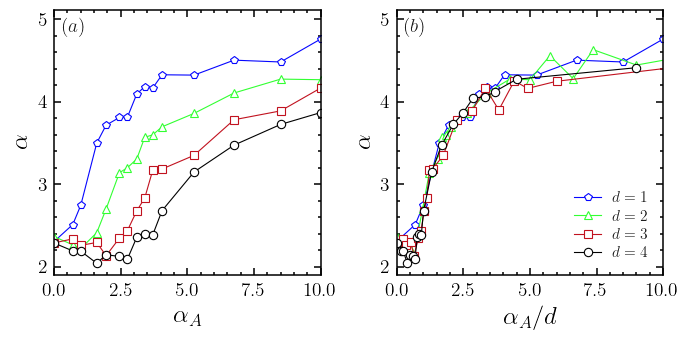

In [176]:
fig, axs = plt.subplots(1, 2, figsize=(7., 3.5), sharex=True, sharey=True)

alpha_G = 2.0
dimensions = [1, 2, 3, 4]
alphas_A = np.arange(0, 10.5, .5)

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for i, d in enumerate(dimensions):
    values = []
    df_ = df[(df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
    alphas_A = sorted(df_['alpha_a'].unique())
    for alpha_A in alphas_A:
        _df = df[(df['alpha_a'] == alpha_A) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
        x, y = _df['N'].tolist(), _df['short_mean'].tolist()
        x = np.log10(x)
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        x_sorted, y_sorted = np.array(x_sorted), np.array(y_sorted)
        mask = x_sorted <= 5.5
        
        def model(x, a, b):
            return a * x + b
        popt, pcov = curve_fit(model, x_sorted[mask], y_sorted[mask], method='lm', maxfev=10000)
        values.append(popt[0])
    sample_idx = np.linspace(0, len(alphas_A) - 1, 20, dtype=int)
    axs[0].plot(np.array(alphas_A)[sample_idx], np.array(values)[sample_idx], marker=markers[i], color=colors[i],
            linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8, label = r'$d = %d$' % d)
    axs[1].plot(np.array(alphas_A)[sample_idx] / d, np.array(values)[sample_idx], marker=markers[i], color=colors[i],
            linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8, label = r'$d = %d$' % d)

axs[0].set_xlabel(r'$\alpha_A$', fontsize=18)
axs[1].set_xlabel(r'$\alpha_A / d$', fontsize=18)
for ax in axs:
    ax.set_ylabel(r'$\alpha$', fontsize=18)
    ax.set_xlim([0, 10])
    # ax.set_xticks([3.5, 4, 4.5, 5, 5.5])
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    
axs[1].legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
          loc = 4, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
          fontsize = 11, ncol = 1)

# setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.7])
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$(b)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig07.pdf', bbox_inches='tight')
plt.show()

In [213]:
import numpy as np

def find_intersections(x, y):
    intersecoes = []

    # Percorre os pontos para encontrar trocas de sinal
    for i in range(len(y) - 1):
        if y[i] * y[i + 1] < 0:  # Troca de sinal indica interseção
            x1, x2 = x[i], x[i + 1]
            y1, y2 = y[i], y[i + 1]
            
            # Cálculo da interseção por interpolação linear
            x_intercept = x1 - (y1 * (x2 - x1)) / (y2 - y1)
            
            intersecoes.append((x_intercept, 0))  # Adiciona o ponto de interseção
            return x_intercept, 0

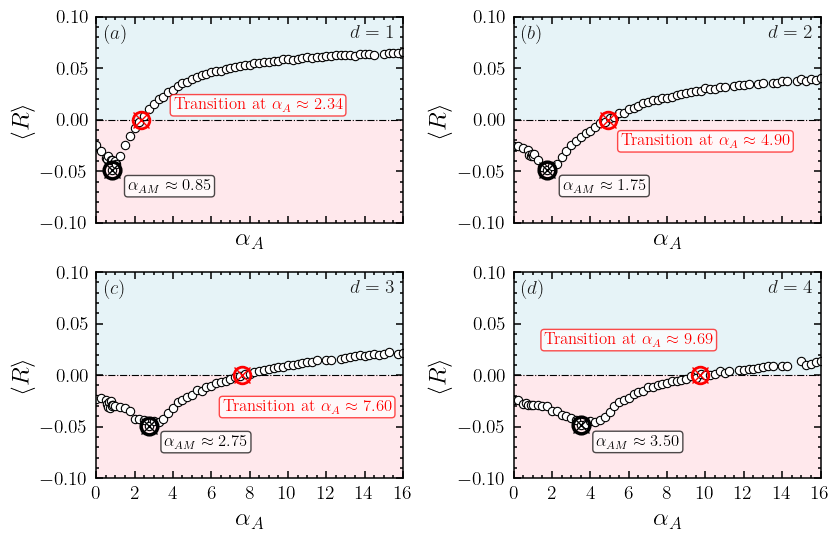

In [253]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_G = 2.0
dimensions = [1, 2, 3, 4]
n = 160000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    ax.plot([0, 16], [0, 0], '-.', color = 'k', lw = .8)
    ax.axhspan(0, 0.10, facecolor='lightblue', alpha = 0.3)  # Azul na parte superior
    ax.axhspan(-0.10, 0, facecolor='lightpink', alpha = 0.3)  # Rosa na parte inferior

    _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
    x, y = _df['alpha_a'].tolist(), _df['ass_coeff_mean'].tolist()
    x_sorted, y_sorted = zip(*sorted(zip(x, y)))
    
    ax.plot(x_sorted, y_sorted, marker=markers[i], color=colors[i],
           linestyle='', lw=.8, markerfacecolor='white', markeredgewidth=.8,
           label = r'$N = %d$' % n)
    # ponto de minino
    min_row = _df.loc[_df['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', zorder=5, label='_nolegend_')
    ax.plot(alpha_min, value_min, marker='o', markersize=12, markerfacecolor='none',
            markeredgecolor='black', markeredgewidth=2.5, zorder=4, label='_nolegend_')
    ax.text(min(alpha_min + 0.8, 14.5), max(value_min - 0.02, -0.09),
            r"$\alpha_{AM} \approx %.2lf$" % alpha_min,
            fontsize=12, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    # ponto de intersessão
    x_intercept, y_intercept = find_intersections(x_sorted, y_sorted)
    ax.plot(x_intercept, y_intercept, 'x', markersize=12, color='red', zorder=5, label='_nolegend_')
    ax.plot(x_intercept, y_intercept, marker='o', markersize=12, markerfacecolor='none',
            markeredgecolor='red', markeredgewidth=2, zorder=4, label='_nolegend_')
    if d == 1:
        x_int, y_int = pos_int[pos_aux][0], pos_int[pos_aux][1]
    elif d == 2:
        x_int, y_int = 10, -.025
    elif d == 3:
        x_int, y_int = 11, -.035
    else:
        x_int, y_int = 6, .03
    ax.text(x_int, y_int,
            rf"Transition at $\alpha_A \approx {x_intercept:.2f}$",
            fontsize = 12, color='red', weight='bold',
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2', alpha=0.7),
            ha='center' if d >= 2 else 'left')
    
for ax in axs:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    ax.set_ylabel(r'$\langle R \rangle$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_ylim([-.10, .1])
    ax.set_xticks(np.arange(0, 18, 2))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)

setlabel(axs[0], r'$d = 1$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$(b)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$(d)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig08.pdf', bbox_inches='tight')
plt.show()

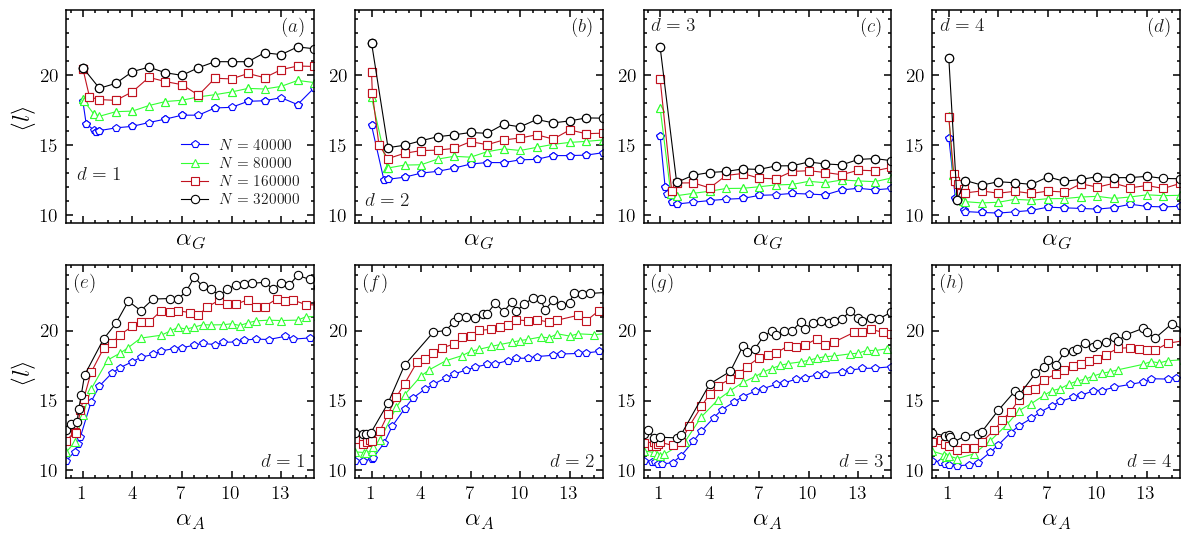

In [267]:
fig, axs = plt.subplots(2, 4, figsize=(12, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_A = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip([axs[0], axs[1], axs[2], axs[3]], dimensions):
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_a'] == alpha_A) & (df['dim'] == d)].copy()
        x, y = _df['alpha_g'].tolist(), _df['short_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        sample_idx = np.linspace(0, len(x_sorted) - 1, 30, dtype=int)
        
        ax.plot(np.array(x_sorted)[sample_idx], np.array(y_sorted)[sample_idx], marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in [axs[0], axs[1], axs[2], axs[3]]:
    ax.set_xlabel(r'$\alpha_G$', fontsize=18)
    # ax.set_ylabel(r'$\langle l \rangle$', fontsize=18)
    ax.set_xlim([1, 16])
    ax.set_xticks(np.arange(1, 18, 3))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[0]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 4, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1, bbox_to_anchor=[1, 0])

setlabel(axs[0], r'$d = 1$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.3])
setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False, bbox_to_anchor=[0.01, 0.18])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

#================================================ bottom ============================================
alpha_G = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip([axs[4], axs[5], axs[6], axs[7]], dimensions):
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
        x, y = _df['alpha_a'].tolist(), _df['short_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        sample_idx = np.linspace(0, len(x_sorted) - 1, 30, dtype=int)
        
        ax.plot(np.array(x_sorted)[sample_idx], np.array(y_sorted)[sample_idx], marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in [axs[4], axs[5], axs[6], axs[7]]:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    # ax.set_ylabel(r'$\langle l \rangle$', fontsize=18)
    ax.set_xlim([0, 15])
    # ax.set_xticks(np.arange(1, 18, 3))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)

axs[0].set_ylabel(r'$\langle l \rangle$', fontsize=18)
axs[4].set_ylabel(r'$\langle l \rangle$', fontsize=18)
setlabel(axs[4], r'$(e)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[5], r'$(f)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[6], r'$(g)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[7], r'$(h)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[4], r'$d = 1$', loc = 4, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[5], r'$d = 2$', loc = 4, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[6], r'$d = 3$', loc = 4, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[7], r'$d = 4$', loc = 4, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig02_painel.pdf', bbox_inches='tight')
plt.show()

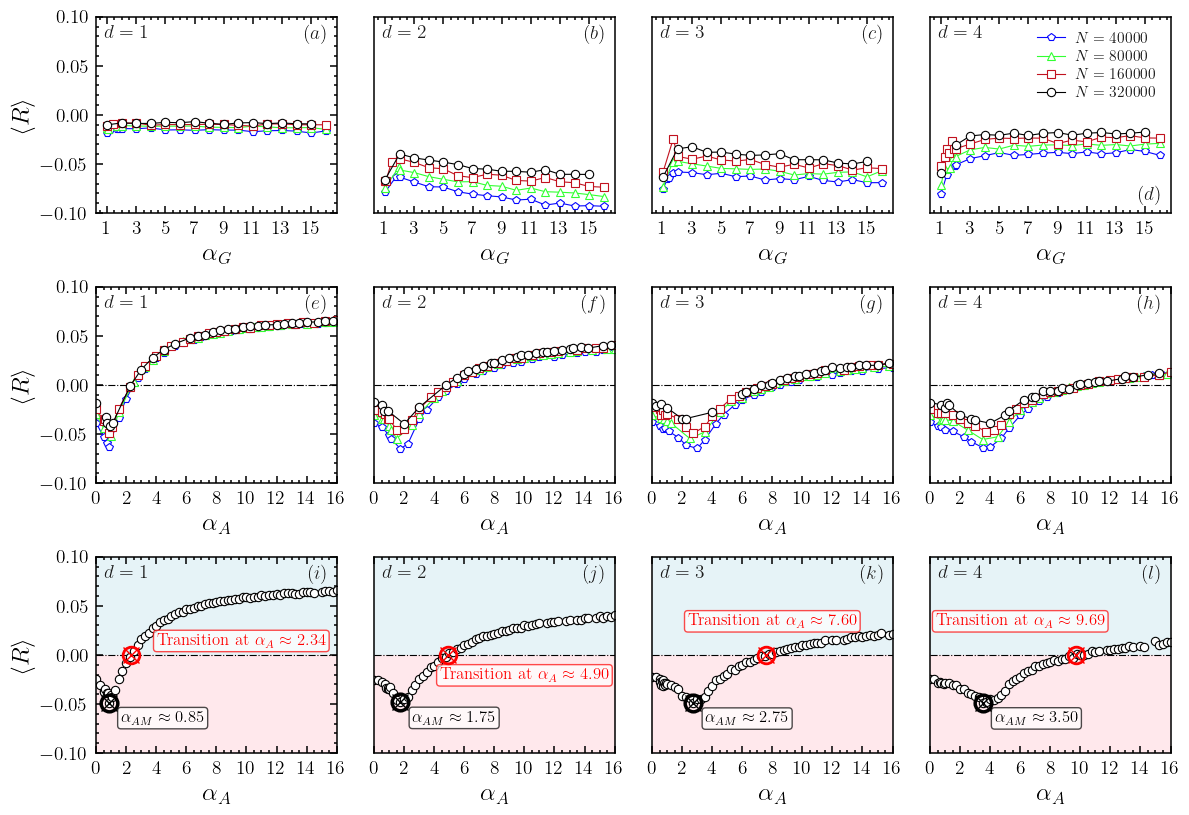

In [297]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8.25), sharex=False, sharey=False)
axs = axs.flatten()

alpha_A = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip([axs[0], axs[1], axs[2], axs[3]], dimensions):
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_a'] == alpha_A) & (df['dim'] == d)].copy()
        x, y = _df['alpha_g'].tolist(), _df['ass_coeff_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        
        ax.plot(x_sorted, y_sorted, marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in [axs[0], axs[1], axs[2], axs[3]]:
    ax.set_xlabel(r'$\alpha_G$', fontsize=18)
    ax.set_xticks(np.arange(1, 17, 2))
    ax.set_ylim([-.10, .1])
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[3]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 1, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1)
#============================= meio =====================================
alpha_G = 2.0
dimensions = [1, 2, 3, 4]
sizes = [40000, 80000, 160000, 320000]

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip([axs[4], axs[5], axs[6], axs[7]], dimensions):
    ax.plot([0, 16], [0, 0], '-.', color = 'k', lw = .8)
    for i,n in enumerate(sizes):
        _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
        x, y = _df['alpha_a'].tolist(), _df['ass_coeff_mean'].tolist()
        x_sorted, y_sorted = zip(*sorted(zip(x, y)))
        sample_idx = np.linspace(0, len(x_sorted) - 1, 30, dtype=int)
        
        ax.plot(np.array(x_sorted)[sample_idx], np.array(y_sorted)[sample_idx], marker=markers[i], color=colors[i],
               linestyle='-', lw=.8, markerfacecolor='white', markeredgewidth=.8,
               label = r'$N = %d$' % n)
for ax in [axs[4], axs[5], axs[6], axs[7]]:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_xticks(np.arange(0, 18, 2))
    ax.set_ylim([-.10, .1])
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
    if ax == axs[0]:
        ax.legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
                  loc = 4, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 11, ncol = 1, bbox_to_anchor=[1, 0])

# ============================ bottom ==============================
alpha_G = 2.0
dimensions = [1, 2, 3, 4]
n = 160000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip([axs[8], axs[9], axs[10], axs[11]], dimensions):
    ax.plot([0, 16], [0, 0], '-.', color = 'k', lw = .8)
    ax.axhspan(0, 0.10, facecolor='lightblue', alpha = 0.3)  # Azul na parte superior
    ax.axhspan(-0.10, 0, facecolor='lightpink', alpha = 0.3)  # Rosa na parte inferior

    _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
    x, y = _df['alpha_a'].tolist(), _df['ass_coeff_mean'].tolist()
    x_sorted, y_sorted = zip(*sorted(zip(x, y)))
    
    ax.plot(x_sorted, y_sorted, marker=markers[i], color=colors[i],
           linestyle='', lw=.8, markerfacecolor='white', markeredgewidth=.8,
           label = r'$N = %d$' % n)
    # ponto de minino
    min_row = _df.loc[_df['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', zorder=5, label='_nolegend_')
    ax.plot(alpha_min, value_min, marker='o', markersize=12, markerfacecolor='none',
            markeredgecolor='black', markeredgewidth=2.5, zorder=4, label='_nolegend_')
    ax.text(min(alpha_min + 0.8, 14.5), max(value_min - 0.02, -0.09),
            r"$\alpha_{AM} \approx %.2lf$" % alpha_min,
            fontsize=12, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    # ponto de intersessão
    x_intercept, y_intercept = find_intersections(x_sorted, y_sorted)
    ax.plot(x_intercept, y_intercept, 'x', markersize=12, color='red', zorder=5, label='_nolegend_')
    ax.plot(x_intercept, y_intercept, marker='o', markersize=12, markerfacecolor='none',
            markeredgecolor='red', markeredgewidth=2, zorder=4, label='_nolegend_')
    if d == 1:
        x_int, y_int = pos_int[pos_aux][0], pos_int[pos_aux][1]
    elif d == 2:
        x_int, y_int = 10, -.025
    elif d == 3:
        x_int, y_int = 8, .03
    else:
        x_int, y_int = 6, .03
    ax.text(x_int, y_int,
            rf"Transition at $\alpha_A \approx {x_intercept:.2f}$",
            fontsize = 12, color='red', weight='bold',
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2', alpha=0.7),
            ha='center' if d >= 2 else 'left')
    
for ax in [axs[8], axs[9], axs[10], axs[11]]:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_ylim([-.10, .1])
    ax.set_xticks(np.arange(0, 18, 2))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)
        
axs[0].set_ylabel(r'$\langle R \rangle$', fontsize=18)
axs[4].set_ylabel(r'$\langle R \rangle$', fontsize=18)
axs[8].set_ylabel(r'$\langle R \rangle$', fontsize=18)

for i, ax in enumerate(axs):
    if i % 4 != 0:
        ax.set_yticks([])
        ax.set_ylabel('')

setlabel(axs[0], r'$d = 1$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[4], r'$d = 1$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[5], r'$d = 2$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[6], r'$d = 3$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[7], r'$d = 4$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[8], r'$d = 1$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[9], r'$d = 2$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[10], r'$d = 3$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[11], r'$d = 4$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$(d)$', loc = 4, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[4], r'$(e)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[5], r'$(f)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[6], r'$(g)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[7], r'$(h)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[8], r'$(i)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[9], r'$(j)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[10], r'$(k)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[11], r'$(l)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig03_painel.pdf', bbox_inches='tight')+
+
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8.5, 5.5), sharex=True, sharey=True)
axs = axs.flatten()

alpha_G = 2.0
dimensions = [1, 2, 3, 4]
n = 160000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, d in zip(axs, dimensions):
    ax.plot([0, 16], [0, 0], '-.', color = 'k', lw = .8)
    ax.axhspan(0, 0.10, facecolor='lightblue', alpha = 0.3)  # Azul na parte superior
    ax.axhspan(-0.10, 0, facecolor='lightpink', alpha = 0.3)  # Rosa na parte inferior

    _df = df[(df['N'] == n) & (df['alpha_g'] == alpha_G) & (df['dim'] == d)].copy()
    x, y = _df['alpha_a'].tolist(), _df['ass_coeff_mean'].tolist()
    x_sorted, y_sorted = zip(*sorted(zip(x, y)))
    
    ax.plot(x_sorted, y_sorted, marker=markers[i], color=colors[i],
           linestyle='', lw=.8, markerfacecolor='white', markeredgewidth=.8,
           label = r'$N = %d$' % n)
    # ponto de minino
    min_row = _df.loc[_df['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', zorder=5, label='_nolegend_')
    ax.plot(alpha_min, value_min, marker='o', markersize=12, markerfacecolor='none',
            markeredgecolor='black', markeredgewidth=2.5, zorder=4, label='_nolegend_')
    ax.text(min(alpha_min + 0.8, 14.5), max(value_min - 0.02, -0.09),
            r"$\alpha_{AM} \approx %.2lf$" % alpha_min,
            fontsize=12, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    # ponto de intersessão
    x_intercept, y_intercept = find_intersections(x_sorted, y_sorted)
    ax.plot(x_intercept, y_intercept, 'x', markersize=12, color='red', zorder=5, label='_nolegend_')
    ax.plot(x_intercept, y_intercept, marker='o', markersize=12, markerfacecolor='none',
            markeredgecolor='red', markeredgewidth=2, zorder=4, label='_nolegend_')
    if d == 1:
        x_int, y_int = pos_int[pos_aux][0], pos_int[pos_aux][1]
    elif d == 2:
        x_int, y_int = 10, -.025
    elif d == 3:
        x_int, y_int = 11, -.035
    else:
        x_int, y_int = 6, .03
    ax.text(x_int, y_int,
            rf"Transition at $\alpha_A \approx {x_intercept:.2f}$",
            fontsize = 12, color='red', weight='bold',
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2', alpha=0.7),
            ha='center' if d >= 2 else 'left')
    
for ax in axs:
    ax.set_xlabel(r'$\alpha_A$', fontsize=18)
    ax.set_ylabel(r'$\langle R \rangle$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_ylim([-.10, .1])
    ax.set_xticks(np.arange(0, 18, 2))
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=14, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.1, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.1, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.1)

setlabel(axs[0], r'$d = 1$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[0], r'$(a)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$d = 2$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[1], r'$(b)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$d = 3$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$d = 4$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$(d)$', loc = 2, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/Fig08.pdf', bbox_inches='tight')
plt.show()